In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Johns Hopkins CSSE's global confirmed cases data is organized by Country/Region. In particular, the data for Australia, Canada, and China is reported at the province level. Let's aggregate all global confirmed cases and deaths data by country only. 

In [2]:
path = "../input/johns-hopkins-csse-covid19-time-series-data/"

### CONSTRUCT TIME SERIES DATE FOR CONFIRMED CASES BY COUNTRY ###

timeseries_confirmed_df = pd.read_csv(path+"time_series_covid19_confirmed_global.csv")
#timeseries_confirmed_df.head(10)

# WRITE NEW FILE AGGREGATING CONFIRMED CASE COUNT BY COUNTRY INSTEAD OF 'COUNTRY/REGION'"
fout = open("time_series_covid19_confirmed_COUNTRY_ONLY.csv",'w')
fout.write("Country")
dates = timeseries_confirmed_df.columns[4:]

for date in dates:
    fout.write(","+date)
fout.write("\n")

countries = list(timeseries_confirmed_df["Country/Region"].value_counts().index)
#print(countries)

for country in countries:
    fout.write(country)
    for date in dates:
        count = np.sum(np.array(timeseries_confirmed_df.set_index("Country/Region").loc[country, date]))
        fout.write(","+str(count))
    fout.write("\n")
fout.close()




In [3]:
### CONSTRUCT TIME SERIES DATEFRAME FOR DEATHS BY COUNTRY ###

timeseries_deaths_df = pd.read_csv(path+"time_series_covid19_deaths_global.csv")
#timeseries_deaths_df.head()

# WRITE NEW FILE AGGREGATING DEATH TOLL BY COUNTRY INSTEAD OF COUNTRY/REGION"
fout = open("time_series_covid19_deaths_COUNTRY_ONLY.csv",'w')
fout.write("Country")
dates = timeseries_deaths_df.columns[4:]
for date in dates:
    fout.write(","+date)
fout.write("\n")

countries = list(timeseries_deaths_df["Country/Region"].value_counts().index)
#print(countries)

for country in countries:
    fout.write(country)
    for date in dates:
        count = np.sum(np.array(timeseries_deaths_df.set_index("Country/Region").loc[country, date]))
        fout.write(","+str(count))
    fout.write("\n")
fout.close()


Likewise, let's aggregate U.S. confirmed cases and deaths data by states and territories.

In [4]:
### CONSTRUCT TIME SERIES DATA FOR CONFIRMED CASES BY US STATE ###

timeseries_confirmed_df = pd.read_csv(path+"time_series_covid19_confirmed_US.csv")

fout = open("time_series_covid19_confirmed_US_STATE.csv",'w')
fout.write("Province_State")
dates = timeseries_confirmed_df.columns[11:]
#print(dates)
for date in dates:
    fout.write(","+date)
fout.write("\n")

states = list(timeseries_confirmed_df["Province_State"].value_counts().index)
#print("states ", states)
#print("len(states) ", len(states))

for state in states:
    fout.write(state)
    for date in dates:
        count = np.sum(np.array(timeseries_confirmed_df.set_index("Province_State").loc[state, date]))
        fout.write(","+str(count))
    fout.write("\n")
fout.close()


In [5]:
### CONSTRUCT TIME SERIES DATA FOR DEATHS BY US STATE ###

timeseries_deaths_df = pd.read_csv(path+"time_series_covid19_deaths_US.csv")

fout = open("time_series_covid19_deaths_US_STATE.csv",'w')
fout.write("Province_State")
dates = timeseries_deaths_df.columns[12:]

for date in dates:
    fout.write(","+date)
fout.write("\n")

states = list(timeseries_deaths_df["Province_State"].value_counts().index)

for state in states:
    fout.write(state)
    for date in dates:
        count = np.sum(np.array(timeseries_deaths_df.set_index("Province_State").loc[state, date]))
        fout.write(","+str(count))
    fout.write("\n")
fout.close()

Let's take a look at country-by-country and US state-by-state confirmed cases and deaths DateFrames.

In [6]:
timeseries_country_cases_df = pd.read_csv("time_series_covid19_confirmed_COUNTRY_ONLY.csv")
timeseries_country_cases_df.head()

,Country,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,8/11/2020,8/12/2020,8/13/2020,8/14/2020,8/15/2020,8/16/2020,8/17/2020,8/18/2020,8/19/2020,8/20/2020
0,China,548,643,920,1406,2075,2877,5509,6087,8141,...,88958,89045,89144,89214,89279,89375,89441,89494,89527,89567
1,Canada,0,0,0,0,1,1,2,2,2,...,122389,122703,123180,123605,123825,124004,124218,125084,125408,125625
2,France,0,0,2,3,3,3,4,5,5,...,239355,244088,244096,249655,252965,252965,256533,256534,256534,256534
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,314542,315581,316729,318190,319232,320343,321064,322177,323008,324203
4,Australia,0,0,0,0,4,5,5,6,9,...,22127,22358,22742,23035,23287,23558,23773,23989,24236,24407


In [7]:
timeseries_state_cases_df = pd.read_csv("time_series_covid19_confirmed_US_STATE.csv")
timeseries_state_cases_df.head()

,Province_State,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,8/11/2020,8/12/2020,8/13/2020,8/14/2020,8/15/2020,8/16/2020,8/17/2020,8/18/2020,8/19/2020,8/20/2020
0,Texas,0,0,0,0,0,0,0,0,0,...,517700,523977,530857,539673,546552,555394,561110,568812,574633,579892
1,Georgia,0,0,0,0,0,0,0,0,0,...,222588,226153,228668,231895,235168,237030,238861,241677,243982,246741
2,Virginia,0,0,0,0,0,0,0,0,0,...,101745,102521,103622,104838,105750,106687,107421,108282,109019,109879
3,Kentucky,0,0,0,0,0,0,0,0,0,...,35793,36945,37686,38298,38930,38930,39691,40299,40926,41626
4,Missouri,0,0,0,0,0,0,0,0,0,...,61440,62956,64429,65793,67004,68196,69225,70055,71285,72353


In [8]:
timeseries_country_deaths_df = pd.read_csv("time_series_covid19_deaths_COUNTRY_ONLY.csv")
timeseries_country_deaths_df.tail()

,Country,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,8/11/2020,8/12/2020,8/13/2020,8/14/2020,8/15/2020,8/16/2020,8/17/2020,8/18/2020,8/19/2020,8/20/2020
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,104,105,106,106,108,110,113,113,119,120
184,Comoros,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
185,Tunisia,0,0,0,0,0,0,0,0,0,...,52,52,53,53,54,54,56,57,60,63
186,Mexico,0,0,0,0,0,0,0,0,0,...,53929,54666,55293,55908,56543,56757,57023,57774,58481,59106
187,Maldives,0,0,0,0,0,0,0,0,0,...,20,21,21,22,22,22,23,24,24,24


In [9]:
timeseries_state_deaths_df = pd.read_csv("time_series_covid19_deaths_US_STATE.csv")
timeseries_state_deaths_df.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20
0,Texas,0,0,0,0,0,0,0,0,0,...,9222,9527,9771,10078,10268,10396,10447,10678,10934,11174
1,Georgia,0,0,0,0,0,0,0,0,0,...,4351,4456,4538,4573,4669,4702,4727,4794,4849,4904
2,Virginia,0,0,0,0,0,0,0,0,0,...,2344,2352,2363,2370,2381,2381,2385,2396,2410,2427
3,Kentucky,0,0,0,0,0,0,0,0,0,...,783,790,796,804,810,810,818,830,842,856
4,Missouri,0,0,0,0,0,0,0,0,0,...,1346,1354,1356,1365,1378,1383,1415,1425,1434,1442


Let's create some pie charts to portray confirmed COVID-19 cases by country, month by month. The rationale for pie charts is to show the change in a given country's fraction of the world's total confirmed COVID-19 cases.

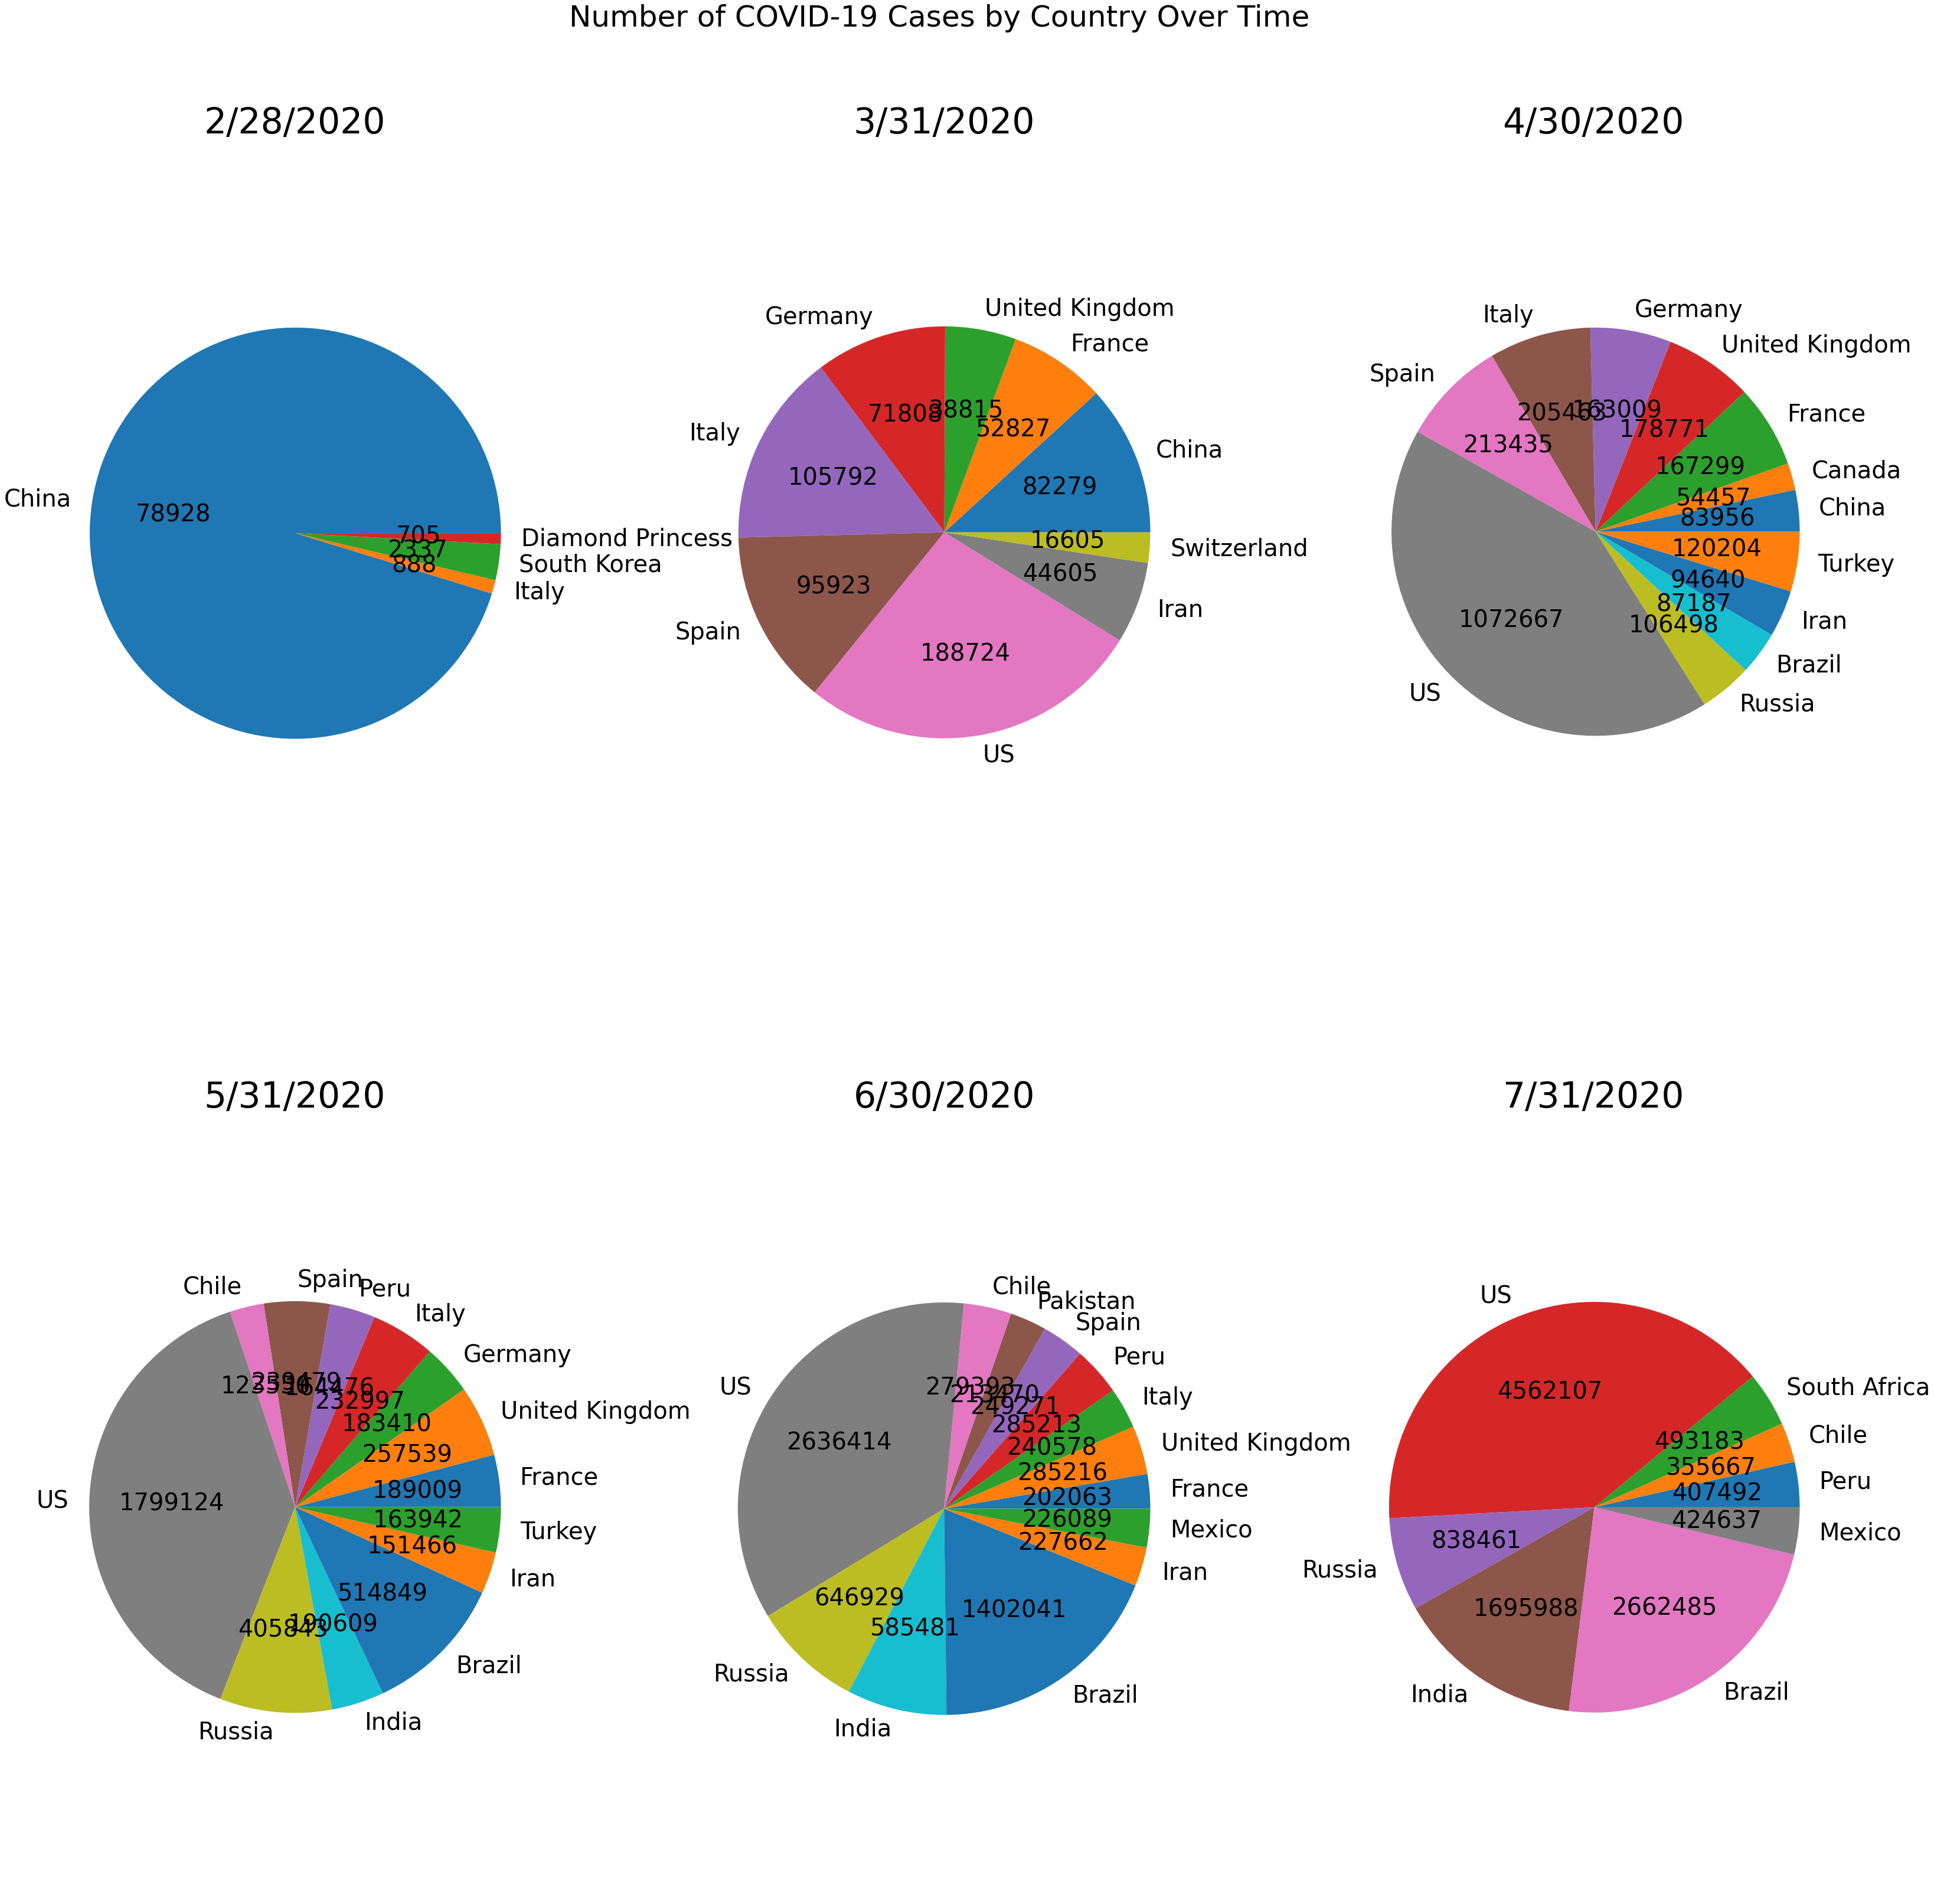

In [10]:
sum = 0
def display_val(val):
    return int(np.round(val*sum/100,0))

#timeseries_confirmed_df.head()
#print(len(timeseries_confirmed_df))
#print(np.sum(np.array(timeseries_confirmed_df.loc["Canada", "3/31/20"])))
count = 0

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
limit = [500, 15000, 50000, 100000, 200000, 350000]

fig, ax = plt.subplots(2, 3, figsize=(50, 50))
fig.tight_layout(pad=30)
fig.suptitle("Number of COVID-19 Cases by Country Over Time", size=50)

for i in range(2):
    for j in range(3):
        sum = 0
    
        labels = []
        values = []
        month_index = i*3 + j

        for k in range(len(timeseries_country_cases_df)):
            date = str(month_index+2)+"/"+ str(days_per_month[month_index+1]) + "/2020"
            if timeseries_country_cases_df.loc[k,date] > limit[month_index]:
                labels.append(timeseries_country_cases_df.loc[k, "Country"])
                values.append(timeseries_country_cases_df.loc[k, date])
            count+=1
    
        sum = np.sum(np.array(values))
        #print("labels ", labels)
        #print("values ", values)
        ax[i][j].set_title(str(date), size=60)
        ax[i][j].pie(values, labels=labels, autopct=display_val, textprops= {'fontsize': 40})
        ax[i][j].axis('equal')

plt.show()

Next, let's create a similar sequence of pie charts for US cases, separated by state/territory.

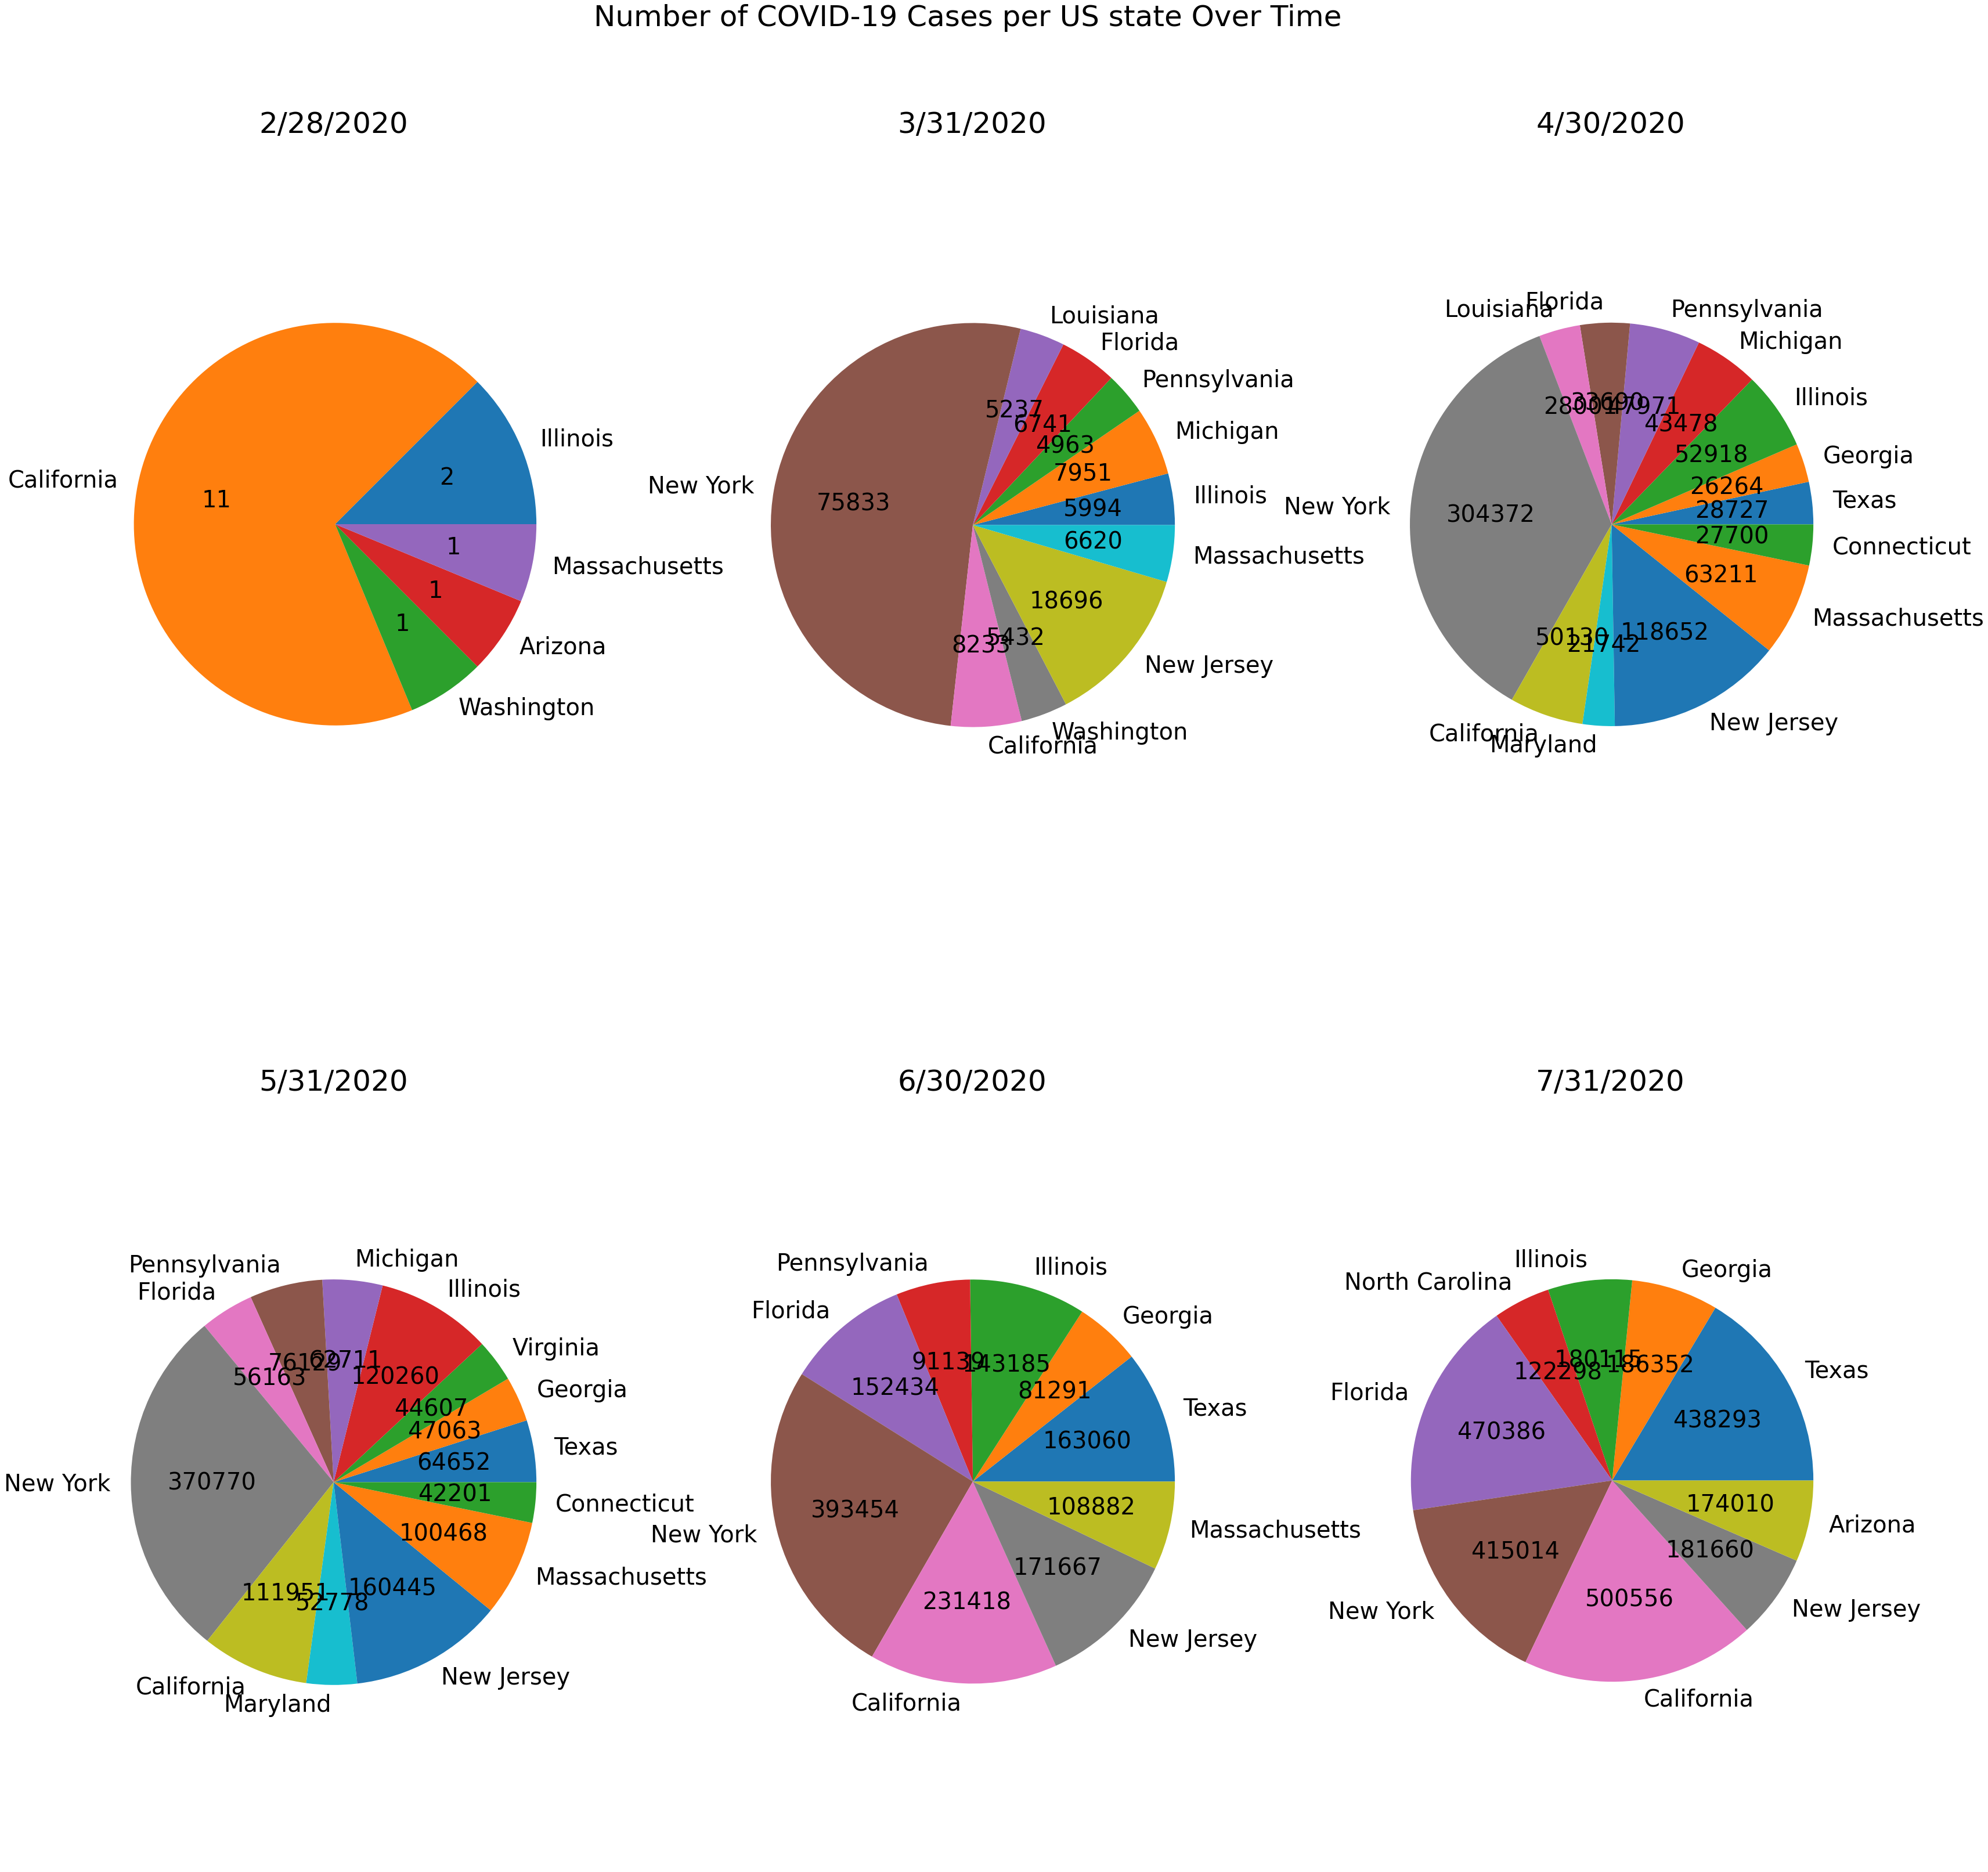

In [11]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
limit = [0, 4000, 20000, 40000, 80000, 120000]

fig, ax = plt.subplots(2, 3, figsize=(50, 50))
fig.tight_layout(pad=30)
fig.suptitle("Number of COVID-19 Cases per US state Over Time", size=50)

for i in range(2):
    for j in range(3):
        global sum
        sum = 0
    
        labels = []
        values = []
        month_index = i*3 + j

        for k in range(len(timeseries_state_cases_df)):
            date = str(month_index+2)+"/"+ str(days_per_month[month_index+1]) + "/2020"
            if timeseries_state_cases_df.loc[k,date] > limit[month_index]:
                labels.append(timeseries_state_cases_df.loc[k, "Province_State"])
                values.append(timeseries_state_cases_df.loc[k, date])
            count+=1
    
        sum = np.sum(np.array(values))
        #print("labels ", labels)
        #print("values ", values)
        ax[i][j].set_title(str(date), size=50)
        ax[i][j].pie(values, labels=labels, autopct=display_val, textprops = {'fontsize': 40})
        ax[i][j].axis('equal')

plt.show()


Pie charts obviously are only useful in showing relative amounts-- in this case, the cases in each state/territory relative to the total number of US cases at a given point in time. Of course, we must also examine the time series of the absolute number of cases in each US state/territory.

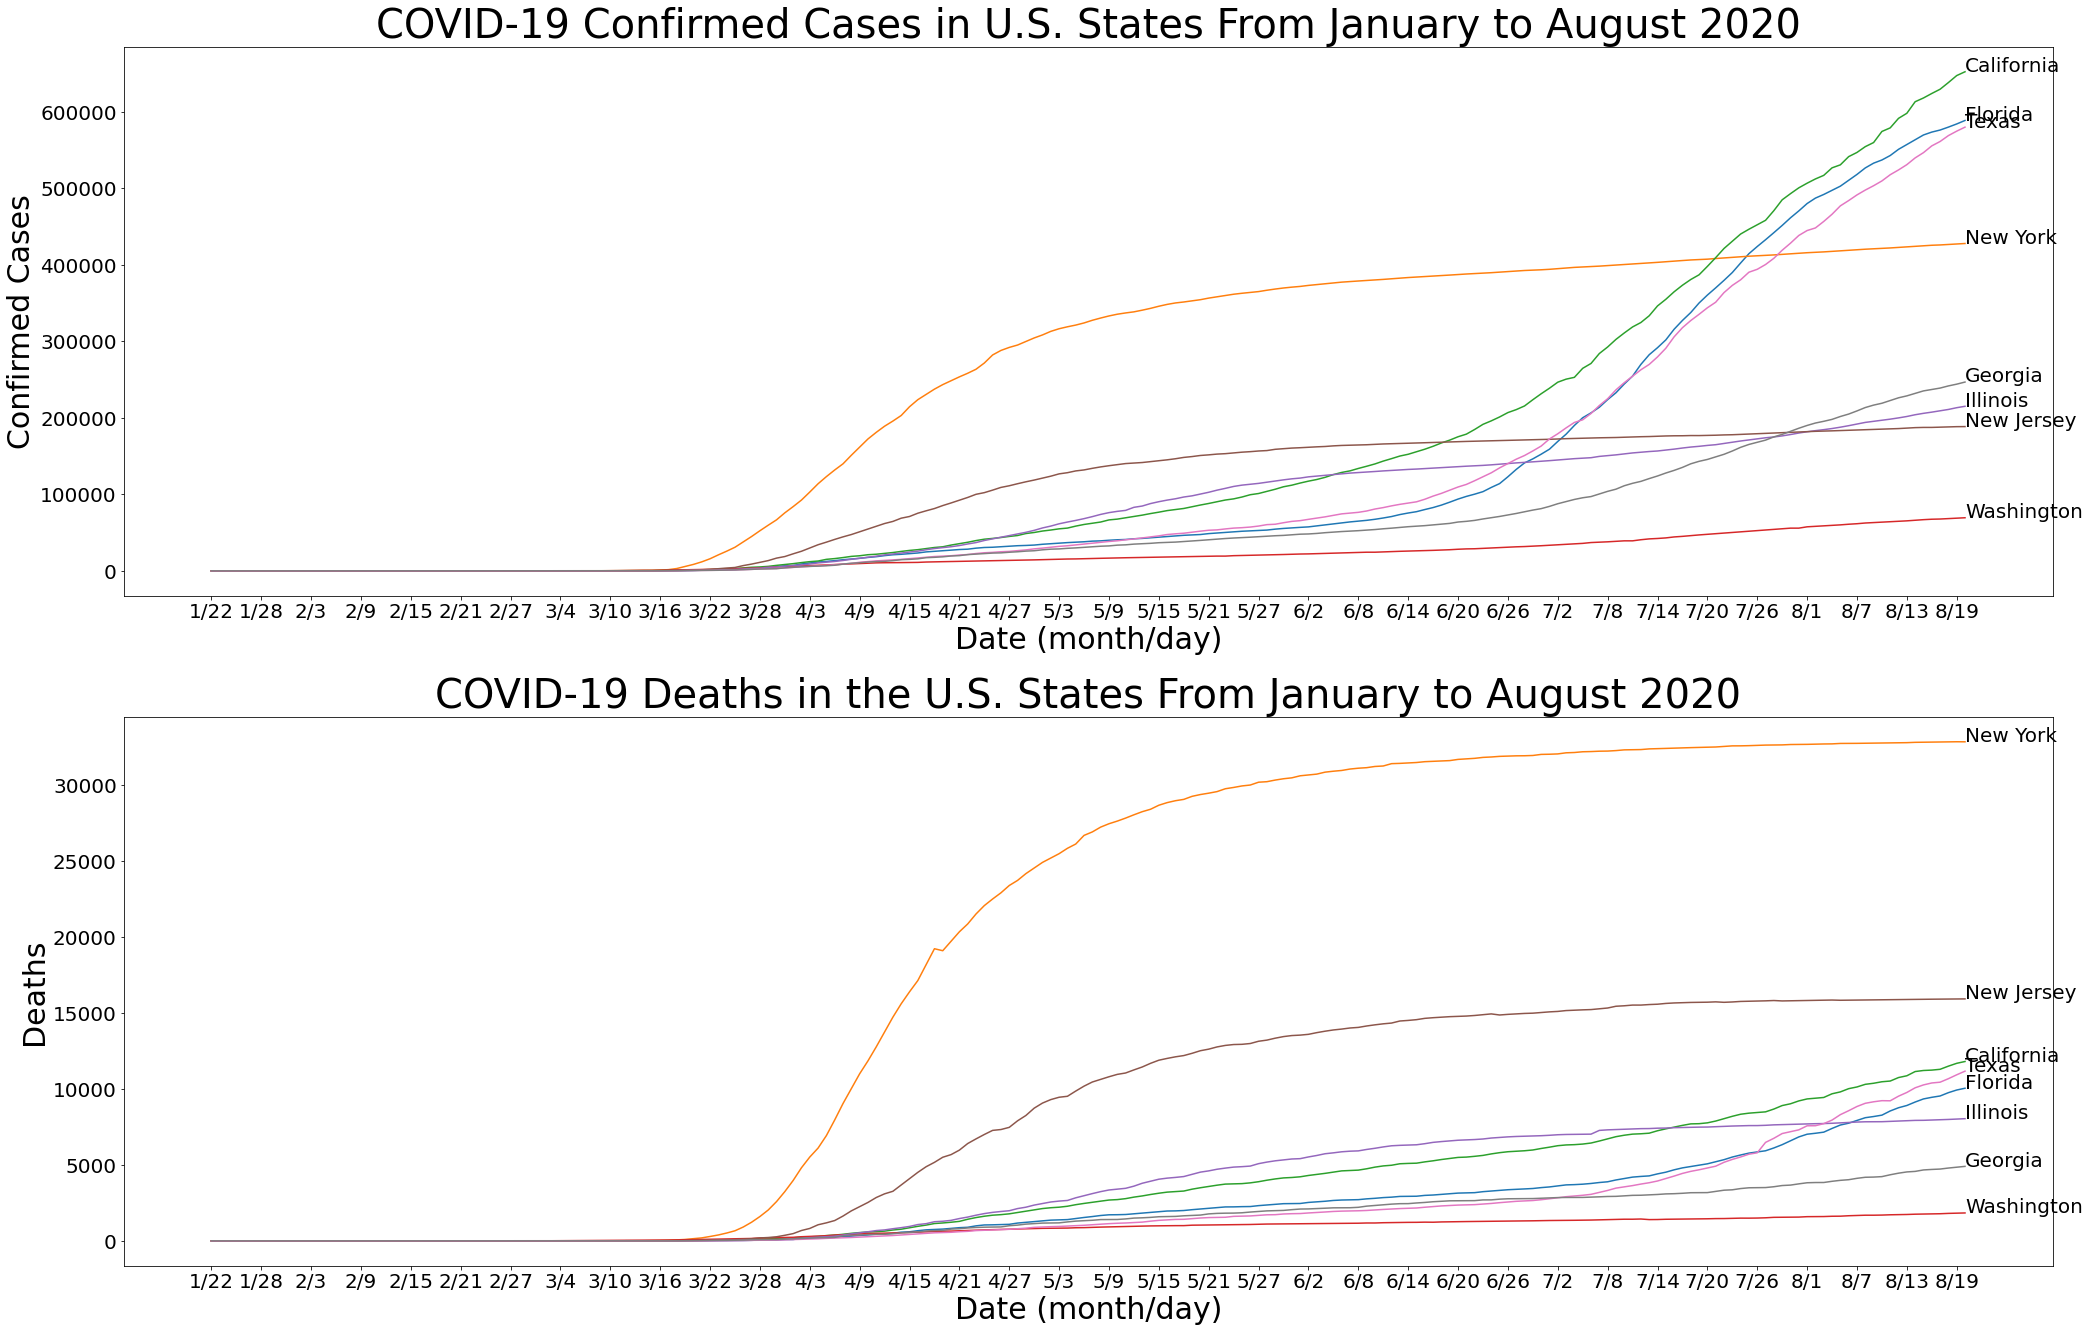

In [12]:
dates =  np.array(timeseries_state_cases_df.columns)[1:]
dates_abbrev = []
for date in dates:
    dates_abbrev.append(date[:-5])
#print("len(dates) ", len(dates))
mindate = 0
maxdate = 213

fig, ax = plt.subplots(2, figsize=(30, 20))
fig.tight_layout(pad=10)

states = ["Florida", "New York", "California", "Washington", "Illinois", "New Jersey", "Texas", "Georgia"]

for state in states:
    cases = np.array(timeseries_state_cases_df.set_index('Province_State').loc[state])
    deaths = np.array(timeseries_state_deaths_df.set_index('Province_State').loc[state])
    
    #print('texas_cases ', texas_cases)
    ax[0].plot(dates_abbrev[mindate:maxdate], cases[mindate:maxdate])
    ax[0].set_xlabel("Date (month/day)", size=30)
    ax[0].set_ylabel("Confirmed Cases", size=30)
    ax[0].set_xticks(range(0, len(dates), 6))
    ax[0].tick_params(labelsize=20)
    ax[0].set_title("COVID-19 Confirmed Cases in U.S. States From January to August 2020", size=40)
    ax[0].annotate(state, (dates_abbrev[-1], cases[-1]), size=20)
    
    ax[1].plot(dates_abbrev[mindate:maxdate], deaths[mindate:maxdate])
    ax[1].set_xlabel("Date (month/day)", size=30)
    ax[1].set_ylabel("Deaths", size=30)
    ax[1].set_xticks(range(0, len(dates), 6))
    ax[1].tick_params(labelsize=20)
    ax[1].set_title("COVID-19 Deaths in the U.S. States From January to August 2020", size=40)
    ax[1].annotate(state, (dates_abbrev[-1], deaths[-1]), size=20)


#plt.xticks(range(0, len(dates), 6), rotation=60)

#plt.rc('font', size=25)
#plt.rc('figure', titlesize=50)
#plt.rc('axes', labelsize=30)
#plt.rc('xtick', labelsize=20)
#plt.rc('ytick', labelsize=20)

plt.show()

Let's create the similar line plots tracking the absolute number of several major countries' total confirmed cases and deaths. 

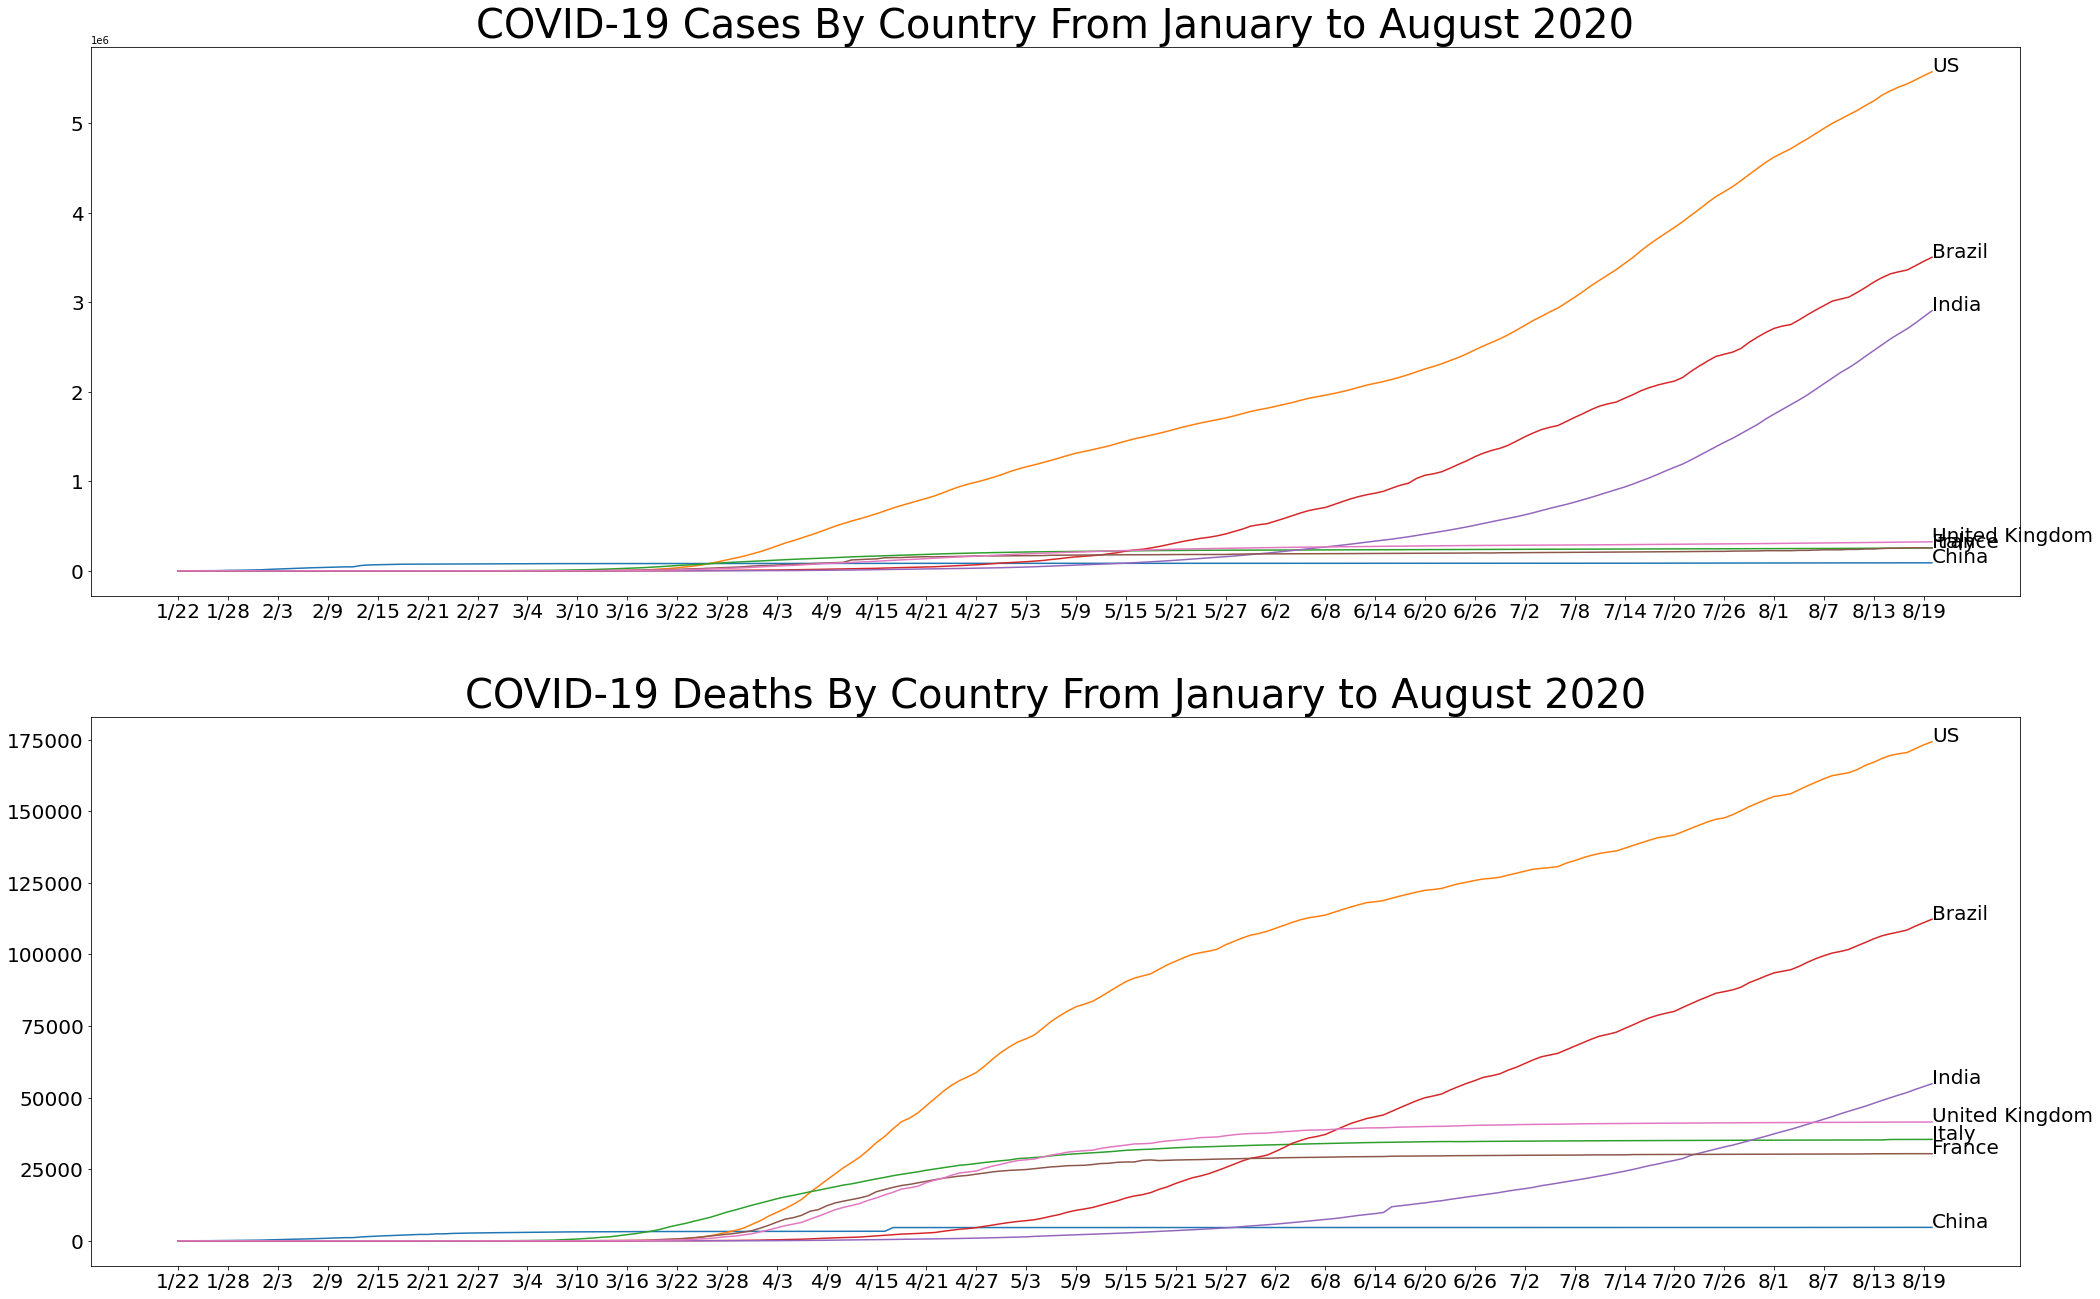

In [13]:
dates =  np.array(timeseries_country_cases_df.columns)[1:]
dates_abbrev = []
for date in dates:
    dates_abbrev.append(date[:-5])
#print("len(dates) ", len(dates))
mindate = 0
maxdate = 213

fig, ax = plt.subplots(2, figsize=(30, 20))
fig.tight_layout(pad=10)

countries = ["China", "US", "Italy", "Brazil", "India", "France", "United Kingdom"]

for country in countries:
    
    cases = np.array(timeseries_country_cases_df.set_index('Country').loc[country])
    ax[0].plot(dates_abbrev[mindate:maxdate], cases[mindate:maxdate])
    ax[0].annotate(country, (dates_abbrev[-1], cases[-1]), size=20)
    ax[0].set_xticks(range(0, len(dates), 6))
    ax[0].tick_params(labelsize=20)
    ax[0].set_title("COVID-19 Cases By Country From January to August 2020", size=40)
    
    deaths = np.array(timeseries_country_deaths_df.set_index('Country').loc[country])
    ax[1].plot(dates_abbrev[mindate:maxdate], deaths[mindate:maxdate])
    ax[1].annotate(country, (dates_abbrev[-1], deaths[-1]), size=20) 
    ax[1].set_xticks(range(0, len(dates), 6))
    ax[1].tick_params(labelsize=20)
    ax[1].set_title("COVID-19 Deaths By Country From January to August 2020", size=40)
    

plt.show()